In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from dotenv import load_dotenv
from langchain_groq import ChatGroq
from dotenv import load_dotenv
import os

In [2]:
load_dotenv()

True

In [3]:
model = ChatGroq(model_name = 'openai/gpt-oss-20b', api_key = os.getenv("GROQ_API_KEY"))

In [4]:
class LLMState(TypedDict):
    question : str
    answer : str
    

In [5]:
def llm_qa(state : LLMState) -> LLMState:
    # extract the question from state
    question = state['question']
    
    # form prompt 
    prompt = f'Answer the following question {question}'
    
    # ask the question 
    outline = model.invoke(prompt).content

    # update 
    state['answer'] = answer

    return state

In [6]:
# create a graph 
graph = StateGraph(LLMState)

# add node 
graph.add_node('llm_qa', llm_qa)

# create a edges
graph.add_edge(START, 'llm_qa')
graph.add_edge('llm_qa', END)

# compile 
workflow = graph.compile()

In [10]:
# Execute 
initial_state = {'question':'How far is moon from the earth'}
final_state = workflow.invoke(initial_state)
print('User Question :',final_state['question'])
print('Answer :',final_state['answer'])

User Question : How far is moon from the earth
Answer : **Average distance:**  
≈ **384 400 km** (≈ 238 855 mi)

**Range (perigee to apogee):**  
- **Perigee (closest):** ≈ 363 300 km (≈ 225 623 mi)  
- **Apogee (farthest):** ≈ 405 500 km (≈ 251 968 mi)

The Moon’s orbit is slightly elliptical, so its distance from Earth varies by about ±21 % over each month.


In [11]:
workflow.invoke(initial_state).content

AttributeError: 'AddableValuesDict' object has no attribute 'content'

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Sample data
emails = [
    "Win money now", 
    "Claim your free prize", 
    "Hello friend how are you",
    "Let's meet for lunch tomorrow",
    "Congratulations you won a lottery"
]
labels = ["spam", "spam", "not spam", "not spam", "spam"]

# Build model
model = make_pipeline(CountVectorizer(), MultinomialNB())

# Train
model.fit(emails, labels)

# Test
test_email = ["Let's win a free lunch"]
print(model.predict(test_email))


['spam']


In [2]:
# Step 1: Import libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Sample dataset
emails = [
    "Win money now", 
    "Claim your free prize", 
    "Lowest price for lottery tickets", 
    "Hi friend, how are you", 
    "Let's meet for lunch tomorrow",
    "Your project deadline is tomorrow",
    "Congratulations, you won a free lottery"
]

labels = ["spam", "spam", "spam", "not spam", "not spam", "not spam", "spam"]

# Step 3: Convert text to features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(emails)   # word counts
y = labels

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Train Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 6: Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 8: Test with a new email
new_email = ["Win a free trip now"]
X_new = vectorizer.transform(new_email)
print("Prediction for new email:", model.predict(X_new))


Accuracy: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

    not spam       0.50      1.00      0.67         1
        spam       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3

Prediction for new email: ['spam']


True Coefficients (used to generate data):
[16.74825823  0.          0.         63.64302495  0.          0.
  0.         10.45678403  0.          0.        ]

Linear Regression Coefficients:
[16.7466579   0.61303984  0.65988282 63.20067536  1.75810222  0.12824216
 -0.9757541   9.15189761  0.36683567 -1.35672266]

Ridge Regression Coefficients:
[15.29230182  0.49415137  0.32098531 57.57467983  1.39142893  0.26842221
 -0.44270192  8.62442057  1.06763965 -1.64533138]

Lasso Regression Coefficients:
[16.1673193   0.          0.         62.7589456   1.21259144 -0.
 -0.47119929  8.74439713  0.         -0.69305388]


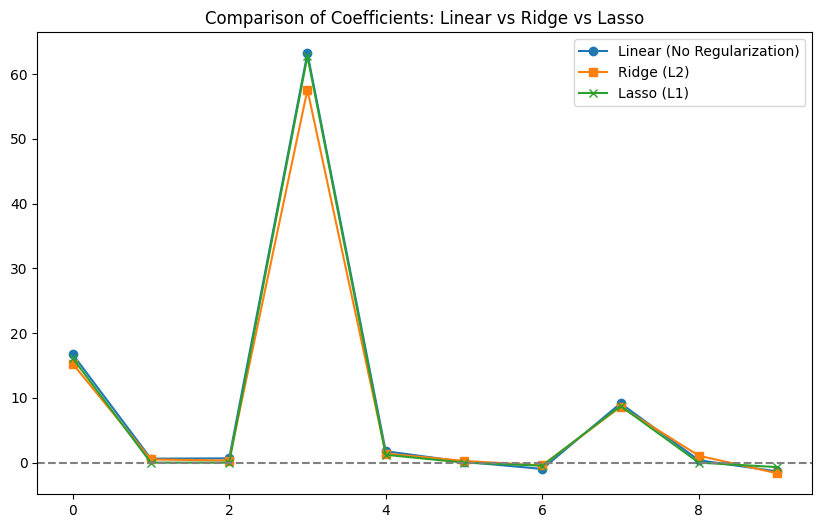

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.datasets import make_regression

# 1. Generate sample data
X, y, coef = make_regression(
    n_samples=100, n_features=10, 
    n_informative=3, noise=10, coef=True, random_state=42
)

print("True Coefficients (used to generate data):")
print(coef)

# 2. Fit Linear, Ridge, and Lasso regression
lin_reg = LinearRegression().fit(X, y)
ridge_reg = Ridge(alpha=10).fit(X, y)     # alpha = λ
lasso_reg = Lasso(alpha=0.5).fit(X, y)

# 3. Compare coefficients
print("\nLinear Regression Coefficients:")
print(lin_reg.coef_)

print("\nRidge Regression Coefficients:")
print(ridge_reg.coef_)

print("\nLasso Regression Coefficients:")
print(lasso_reg.coef_)

# 4. Plot coefficient comparison
plt.figure(figsize=(10,6))
plt.plot(lin_reg.coef_, 'o-', label="Linear (No Regularization)")
plt.plot(ridge_reg.coef_, 's-', label="Ridge (L2)")
plt.plot(lasso_reg.coef_, 'x-', label="Lasso (L1)")
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.title("Comparison of Coefficients: Linear vs Ridge vs Lasso")
plt.show()


R² Scores:
Linear Regression -> Train: 0.936, Test: 0.928
Ridge Regression  -> Train: 0.932, Test: 0.929
Lasso Regression  -> Train: 0.935, Test: 0.933


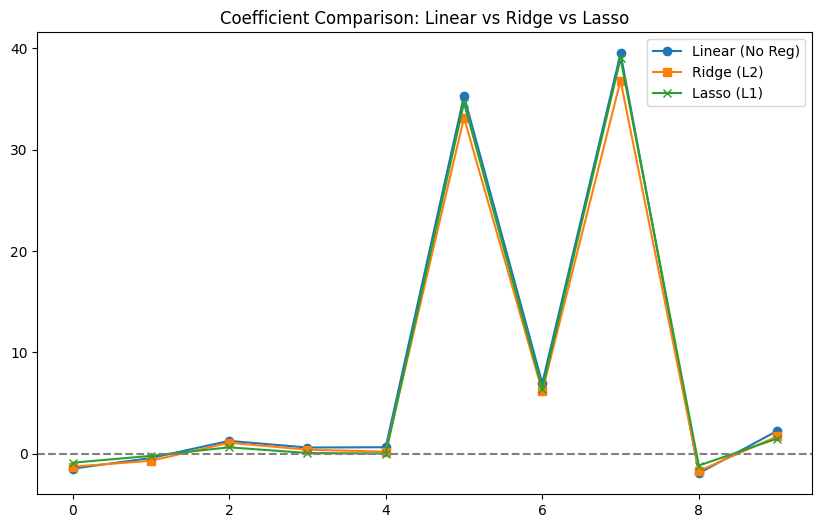

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 1. Generate synthetic dataset
X, y = make_regression(
    n_samples=200, n_features=10,
    n_informative=3, noise=15,
    random_state=42
)

# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Train models
lin_reg = LinearRegression().fit(X_train, y_train)
ridge_reg = Ridge(alpha=10).fit(X_train, y_train)   # alpha = λ
lasso_reg = Lasso(alpha=0.5).fit(X_train, y_train)

# 3. Predictions
y_pred_lin = lin_reg.predict(X_test)
y_pred_ridge = ridge_reg.predict(X_test)
y_pred_lasso = lasso_reg.predict(X_test)

# 4. Evaluate with R² score
print("R² Scores:")
print(f"Linear Regression -> Train: {r2_score(y_train, lin_reg.predict(X_train)):.3f}, Test: {r2_score(y_test, y_pred_lin):.3f}")
print(f"Ridge Regression  -> Train: {r2_score(y_train, ridge_reg.predict(X_train)):.3f}, Test: {r2_score(y_test, y_pred_ridge):.3f}")
print(f"Lasso Regression  -> Train: {r2_score(y_train, lasso_reg.predict(X_train)):.3f}, Test: {r2_score(y_test, y_pred_lasso):.3f}")

# 5. Plot coefficients
plt.figure(figsize=(10,6))
plt.plot(lin_reg.coef_, 'o-', label="Linear (No Reg)")
plt.plot(ridge_reg.coef_, 's-', label="Ridge (L2)")
plt.plot(lasso_reg.coef_, 'x-', label="Lasso (L1)")
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.title("Coefficient Comparison: Linear vs Ridge vs Lasso")
plt.show()


Best alpha for Ridge: 0.1
Best alpha for Lasso: 0.4094915062380423

Test R² Scores:
Ridge (best α=0.1): 0.928
Lasso (best α=0.4094915062380423): 0.932


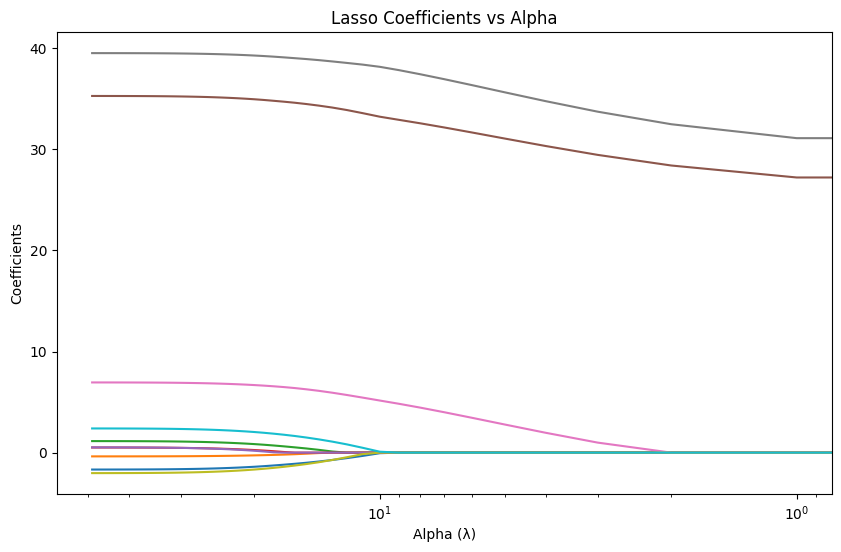

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 1. Generate synthetic dataset
X, y = make_regression(
    n_samples=200, n_features=10,
    n_informative=3, noise=15,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. RidgeCV: test multiple alphas
ridge_cv = RidgeCV(alphas=[0.1, 1, 10, 50, 100], cv=5).fit(X_train, y_train)
lasso_cv = LassoCV(alphas=np.logspace(-3, 1, 50), cv=5, random_state=42).fit(X_train, y_train)

# 3. Print best alpha values
print(f"Best alpha for Ridge: {ridge_cv.alpha_}")
print(f"Best alpha for Lasso: {lasso_cv.alpha_}")

# 4. Evaluate on test data
print("\nTest R² Scores:")
print(f"Ridge (best α={ridge_cv.alpha_}): {r2_score(y_test, ridge_cv.predict(X_test)):.3f}")
print(f"Lasso (best α={lasso_cv.alpha_}): {r2_score(y_test, lasso_cv.predict(X_test)):.3f}")

# 5. Plot Lasso coefficient path
plt.figure(figsize=(10,6))
plt.plot(lasso_cv.path(X_train, y_train, alphas=lasso_cv.alphas_)[1].T)
plt.xscale("log")
plt.gca().invert_xaxis()
plt.xlabel("Alpha (λ)")
plt.ylabel("Coefficients")
plt.title("Lasso Coefficients vs Alpha")
plt.show()


In [6]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download WordNet (only once)
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Example words
words = ["playing", "studies", "running", "better", "cars", "flies"]

print(f"{'Word':<10}{'Stemmed':<15}{'Lemmatized':<15}")
print("-" * 40)
for w in words:
    stem = stemmer.stem(w)
    lemma = lemmatizer.lemmatize(w, pos='v')  # pos='v' = treat as verb
    print(f"{w:<10}{stem:<15}{lemma:<15}")


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vrush\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vrush\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Word      Stemmed        Lemmatized     
----------------------------------------
playing   play           play           
studies   studi          study          
running   run            run            
better    better         better         
cars      car            cars           
flies     fli            fly            


In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Sample documents
docs = [
    "I love AI and machine learning",
    "I love NLP and AI",
    "AI is the future of technology"
]

# ---------------------------
# 1. Bag of Words (BoW)
# ---------------------------
count_vectorizer = CountVectorizer()
bow_matrix = count_vectorizer.fit_transform(docs)

print("Vocabulary (BoW):")
print(count_vectorizer.get_feature_names_out())
print("\nBoW Matrix:")
print(bow_matrix.toarray())

# ---------------------------
# 2. TF-IDF
# ---------------------------
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(docs)

print("\nVocabulary (TF-IDF):")
print(tfidf_vectorizer.get_feature_names_out())
print("\nTF-IDF Matrix:")
print(tfidf_matrix.toarray())


Vocabulary (BoW):
['ai' 'and' 'future' 'is' 'learning' 'love' 'machine' 'nlp' 'of'
 'technology' 'the']

BoW Matrix:
[[1 1 0 0 1 1 1 0 0 0 0]
 [1 1 0 0 0 1 0 1 0 0 0]
 [1 0 1 1 0 0 0 0 1 1 1]]

Vocabulary (TF-IDF):
['ai' 'and' 'future' 'is' 'learning' 'love' 'machine' 'nlp' 'of'
 'technology' 'the']

TF-IDF Matrix:
[[0.31544415 0.40619178 0.         0.         0.53409337 0.40619178
  0.53409337 0.         0.         0.         0.        ]
 [0.37311881 0.4804584  0.         0.         0.         0.4804584
  0.         0.63174505 0.         0.         0.        ]
 [0.2553736  0.         0.43238509 0.43238509 0.         0.
  0.         0.         0.43238509 0.43238509 0.43238509]]
